<a href="https://colab.research.google.com/github/jpatel0/Colab-notebooks/blob/master/Hand_Gesture_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget "http://www.ee.oulu.fi/research/imag/Ouhands/OUHANDS_train.tar.gz"

--2019-07-13 03:50:56--  http://www.ee.oulu.fi/research/imag/Ouhands/OUHANDS_train.tar.gz
Resolving www.ee.oulu.fi (www.ee.oulu.fi)... 130.231.61.28, 2001:708:520:80::28
Connecting to www.ee.oulu.fi (www.ee.oulu.fi)|130.231.61.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2631089581 (2.5G) [application/x-gzip]
Saving to: ‘OUHANDS_train.tar.gz’

OUHANDS_train.tar.g 100%[===================>]   2.45G  19.5MB/s    in 2m 26s  

2019-07-13 03:53:22 (17.2 MB/s) - ‘OUHANDS_train.tar.gz’ saved [2631089581/2631089581]



In [0]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from sklearn.utils import shuffle
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive

# create on Colab directory
model.save('model.h5')    
model_file = drive.CreateFile({'title' : 'sign93.h5'})
model_file.SetContentFile('signs.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

In [45]:
!tar xvf OUHANDS_train.tar.gz

train/hand_data/colour/F-mmc-0007.png
train/negative_data/colour/1599.png
train/hand_data/colour/D-mma-0001.png
train/hand_data/segmentation/F-sta-0007.png
train/negative_data/colour/1938.png
train/negative_data/colour/1796.png
train/hand_data/segmentation/E-zba-0004.png
train/hand_data/colour/J-rsa-0003.png
train/hand_data/orientation/A-rha-0007.txt
train/hand_data/bounding_box/I-mka-0007.txt
train/negative_data/colour/1993.png
train/hand_data/bounding_box/E-sta-0010.txt
train/hand_data/orientation/C-vkb-0010.txt
train/hand_data/orientation/D-mka-0003.txt
train/hand_data/orientation/B-jya-0002.txt
train/negative_data/colour/0947.png
train/hand_data/bounding_box/A-rsa-0002.txt
train/hand_data/depth/J-zba-0009.png
train/hand_data/bounding_box/H-psa-0008.txt
train/hand_data/colour/F-zba-0004.png
train/hand_data/segmentation/K-mka-0009.png
train/hand_data/segmentation/I-jya-0008.png
train/hand_data/depth/E-mma-0002.png
train/hand_data/orientation/D-ima-0008.txt
train/hand_data/orientation

In [0]:
def loadtrain():
  with open('./data_split_for_intermediate_tests/training_files.txt','r') as f:
    trainlst = f.read().split('\n')
  img_dir = './train/hand_data/colour'
  trainimages = []
  labels = []
  for imagename in trainlst:
    if(len(imagename)>4):
      im = image.load_img(os.path.join(img_dir,imagename))
      im = image.img_to_array(im)
      im = cv2.resize(im,(299,299))
      im = im/255.0
      trainimages.append(im)
      if(imagename.startswith('A')):
        labels.append(0)
      elif(imagename.startswith('B')):
        labels.append(1)
      elif(imagename.startswith('C')):
        labels.append(2)
      elif(imagename.startswith('D')):
        labels.append(3)
      elif(imagename.startswith('E')):
        labels.append(4)
      elif(imagename.startswith('F')):
        labels.append(5)
      elif(imagename.startswith('H')):
        labels.append(6)
      elif(imagename.startswith('I')):
        labels.append(7)
      elif(imagename.startswith('J')):
        labels.append(8)
      elif(imagename.startswith('K')):
        labels.append(9)
      
  return np.array(trainimages),np.array(labels)

In [0]:
def loadval():
  with open('./data_split_for_intermediate_tests/validation_files.txt','r') as f:
    trainlst = f.read().split('\n')
  img_dir = './train/hand_data/colour'
  trainimages = []
  labels = []
  for imagename in trainlst:
    if(len(imagename)>4):
      im = image.load_img(os.path.join(img_dir,imagename))
      im = image.img_to_array(im)
      im = cv2.resize(im,(299,299))
      im = im/255.0
      trainimages.append(im)
      if(imagename.startswith('A')):
        labels.append(0)
      elif(imagename.startswith('B')):
        labels.append(1)
      elif(imagename.startswith('C')):
        labels.append(2)
      elif(imagename.startswith('D')):
        labels.append(3)
      elif(imagename.startswith('E')):
        labels.append(4)
      elif(imagename.startswith('F')):
        labels.append(5)
      elif(imagename.startswith('H')):
        labels.append(6)
      elif(imagename.startswith('I')):
        labels.append(7)
      elif(imagename.startswith('J')):
        labels.append(8)
      elif(imagename.startswith('K')):
        labels.append(9)
      
  return np.array(trainimages),np.array(labels)

In [0]:
X,y = loadtrain()

In [0]:
traindf = pd.read_csv('./data_split_for_intermediate_tests/training_files.txt')

In [0]:
traindf.columns = ['filename']

In [0]:
def makedirs(dirct):
  os.mkdir(os.path.join(dirct,'a'))
  os.mkdir(os.path.join(dirct,'b'))
  os.mkdir(os.path.join(dirct,'c'))
  os.mkdir(os.path.join(dirct,'d'))
  os.mkdir(os.path.join(dirct,'e'))
  os.mkdir(os.path.join(dirct,'f'))
  os.mkdir(os.path.join(dirct,'h'))
  os.mkdir(os.path.join(dirct,'i'))
  os.mkdir(os.path.join(dirct,'j'))
  os.mkdir(os.path.join(dirct,'k'))
  os.mkdir(os.path.join(dirct,'nothing'))

In [0]:
def buildtrainfolders():
  direc = './train/hand_data/colour'
  try:
    makedirs(direc)
  except:
    pass
  with open('./data_split_for_intermediate_tests/training_files.txt','r') as f:
    images = f.read().split('\n')
    images.pop(-1)
  for imagename in images:
    if(imagename.startswith('A')):
      os.rename(os.path.join(direc,imagename),os.path.join('./train/hand_data/colour/a',imagename))
    elif(imagename.startswith('B')):
      os.rename(os.path.join(direc,imagename),os.path.join('./train/hand_data/colour/b',imagename))
    elif(imagename.startswith('C')):
      os.rename(os.path.join(direc,imagename),os.path.join('./train/hand_data/colour/c',imagename))
    elif(imagename.startswith('D')):
      os.rename(os.path.join(direc,imagename),os.path.join('./train/hand_data/colour/d',imagename))
    elif(imagename.startswith('E')):
      os.rename(os.path.join(direc,imagename),os.path.join('./train/hand_data/colour/e',imagename))
    elif(imagename.startswith('F')):
      os.rename(os.path.join(direc,imagename),os.path.join('./train/hand_data/colour/f',imagename))
    elif(imagename.startswith('H')):
      os.rename(os.path.join(direc,imagename),os.path.join('./train/hand_data/colour/h',imagename))
    elif(imagename.startswith('I')):
      os.rename(os.path.join(direc,imagename),os.path.join('./train/hand_data/colour/i',imagename))
    elif(imagename.startswith('J')):
      os.rename(os.path.join(direc,imagename),os.path.join('./train/hand_data/colour/j',imagename))
    elif(imagename.startswith('K')):
      os.rename(os.path.join(direc,imagename),os.path.join('./train/hand_data/colour/k',imagename))
  for img in os.listdir('./train/negative_data/colour')[:3300]:
    path = os.path.join('./train/negative_data/colour',img)
    os.rename(path,os.path.join('./train/hand_data/colour/nothing',img))

In [0]:
import shutil
shutil.rmtree("./train")
shutil.rmtree("./data_split_for_intermediate_tests")

In [0]:
def buildvalfolders():
  direc = './train/hand_data/colour'
  try:
    os.mkdir('val')
    makedirs('./val')
  except:
    pass
  with open('./data_split_for_intermediate_tests/validation_files.txt','r') as f:
    images = f.read().split('\n')
    images.pop(-1)
  for imagename in images:
    if(imagename.startswith('A')):
      os.rename(os.path.join(direc,imagename),os.path.join('./val/a',imagename))
    elif(imagename.startswith('B')):
      os.rename(os.path.join(direc,imagename),os.path.join('./val/b',imagename))
    elif(imagename.startswith('C')):
      os.rename(os.path.join(direc,imagename),os.path.join('./val/c',imagename))
    elif(imagename.startswith('D')):
      os.rename(os.path.join(direc,imagename),os.path.join('./val/d',imagename))
    elif(imagename.startswith('E')):
      os.rename(os.path.join(direc,imagename),os.path.join('./val/e',imagename))
    elif(imagename.startswith('F')):
      os.rename(os.path.join(direc,imagename),os.path.join('./val/f',imagename))
    elif(imagename.startswith('H')):
      os.rename(os.path.join(direc,imagename),os.path.join('./val/h',imagename))
    elif(imagename.startswith('I')):
      os.rename(os.path.join(direc,imagename),os.path.join('./val/i',imagename))
    elif(imagename.startswith('J')):
      os.rename(os.path.join(direc,imagename),os.path.join('./val/j',imagename))
    elif(imagename.startswith('K')):
      os.rename(os.path.join(direc,imagename),os.path.join('./val/k',imagename))
  for img in os.listdir('./train/negative_data/colour'):
    path = os.path.join('./train/negative_data/colour',img)
    os.rename(path,os.path.join('./val/nothing',img))
  

In [0]:
buildtrainfolders()

In [0]:
buildvalfolders()

In [0]:
X_train,y_train = shuffle(X,y)

In [0]:
img_height=299
img_width=299
batch_size=32
X=[]
y=[]

In [0]:
val_x,val_y = loadval()

In [0]:
X_test, y_test = shuffle(val_x,val_y)

In [0]:
val_x=[]
val_y=[]

In [5]:
train_data_dir = "./train/hand_data/colour"
val_data_dir = "./val"
img_height=299
img_width=299
batch_size=32

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,horizontal_flip=True,rotation_range=20)

val_datagen = ImageDataGenerator(rescale=1./255)
 

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True) 

validation_generator = val_datagen.flow_from_directory(
    val_data_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True) 

Found 4900 images belonging to 11 classes.
Found 512 images belonging to 11 classes.


In [6]:
IMG_SHAPE = (img_height, img_width, 3)

base_model = tf.keras.applications.Xception(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

W0713 06:30:25.858845 140549613578112 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
base_model.trainable = False

In [0]:
base_model.summary()

In [0]:
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1024, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(11, activation='sigmoid')
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

In [10]:
epochs = 5

history = model.fit(X_train,y_train,batch_size=32,
                    validation_data=(X_test,y_test),
                              epochs=epochs,
                              workers=4,
                              use_multiprocessing=True,shuffle=True)

NameError: ignored

In [11]:
epochs = 5
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch = 32,
                              epochs=epochs,
                              workers=4,
                              use_multiprocessing=True,
                              validation_data=validation_generator,
                              validation_steps=32)

Epoch 1/5


W0713 06:31:12.790014 140549613578112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


32/32 [==============================] - 48s 2s/step - loss: 1.3517 - acc: 0.6377 - val_loss: 2.0261 - val_acc: 0.2188
Epoch 2/5
32/32 [==============================] - 41s 1s/step - loss: 0.8349 - acc: 0.6757 - val_loss: 1.8941 - val_acc: 0.2188
Epoch 3/5
32/32 [==============================] - 38s 1s/step - loss: 0.8556 - acc: 0.6670 - val_loss: 1.8606 - val_acc: 0.3066
Epoch 4/5
32/32 [==============================] - 42s 1s/step - loss: 0.6900 - acc: 0.7490 - val_loss: 1.7287 - val_acc: 0.3398
Epoch 5/5
32/32 [==============================] - 40s 1s/step - loss: 0.6391 - acc: 0.7764 - val_loss: 1.9279 - val_acc: 0.3652


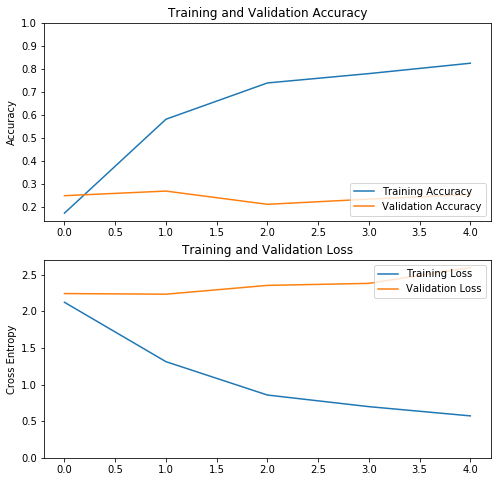

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
base_model.trainable = True

In [0]:
fine_tune_at = 30

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
epochs = 1

history = model.fit(X_train,y_train,batch_size=32,
                    validation_data=(X_test,y_test),
                              epochs=epochs,
                              workers=4,
                              use_multiprocessing=True,shuffle=True)

Train on 1600 samples, validate on 400 samples
1600/1600 [==============================] - 36s 23ms/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1631 - val_acc: 0.9325


In [17]:
history_fine = model.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=1,
                                   use_multiprocessing=True,
                                   workers=4,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps)

153/153 [==============================] - 151s 989ms/step - loss: 0.0271 - acc: 0.9969 - val_loss: 0.1692 - val_acc: 0.9355


In [0]:
history.history

{'acc': [1.0],
 'loss': [0.0016548775031697005],
 'val_acc': [0.9325],
 'val_loss': [0.16312405198812485]}

In [0]:
model.save('signadded.h5')

In [0]:
from google.colab import files

files.download('signadded.h5')

In [0]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

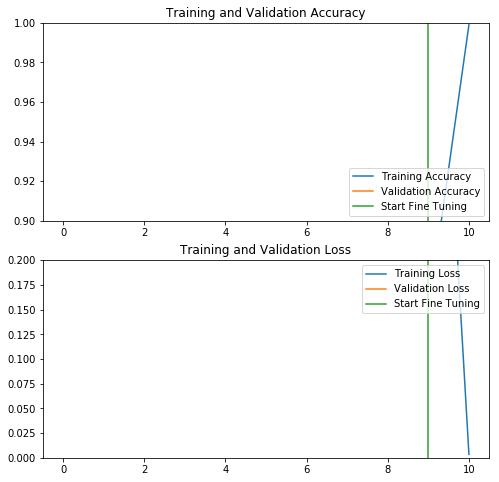

In [0]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

--2019-07-06 19:25:55--  https://www.google.com/url?sa=i
Resolving www.google.com (www.google.com)... 74.125.140.104, 74.125.140.105, 74.125.140.103, ...
Connecting to www.google.com (www.google.com)|74.125.140.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘url?sa=i’

url?sa=i                [ <=>                ]   1.36K  --.-KB/s    in 0s      

2019-07-06 19:25:55 (32.9 MB/s) - ‘url?sa=i’ saved [1395]



In [0]:
os.rename("url?sa=i","test.webp")

FileNotFoundError: ignored

In [0]:
import cv2

In [0]:
classes = {'0':'fist','1':'highfive','2':'one','3':'L two',
           '4':'twopeace','5':'three','6':'web shoot','7':'pinky','8':'4palm',
           '9':'two','10':'nothing'}

In [0]:
im = cv2.imread("./senz3d_dataset/acquisitions/train/G3/S2G3-13-color.png")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

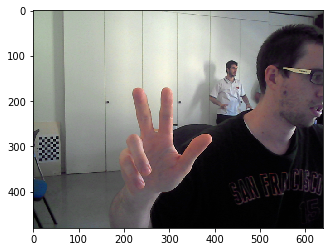

In [0]:
plt.imshow(im)

In [0]:
im = cv2.imread("photo.jpg")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

In [0]:
im = cv2.resize(im,(299,299))
im = im /255.0

In [0]:

from keras.applications.xception import preprocess_input
im = cv2.resize(im,(299,299))
im = np.expand_dims(im,0)
im = preprocess_input(im)

In [25]:
pred = model.predict(np.expand_dims(im,0))
# top5 = 
print(classes[str(np.argmax(pred))],np.max(pred))

nothing 0.0016346852


In [0]:
pred

array([[1.3371110e-03, 5.9604645e-08, 9.6896291e-04, 8.3446503e-07,
        1.0728836e-06, 4.3511391e-06, 8.9406967e-08, 3.5366416e-03,
        1.3432627e-06, 1.1179552e-06]], dtype=float32)

In [0]:
model.evaluate_generator(train_generator)

[0.13882892121161733, 0.9663636]

In [0]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


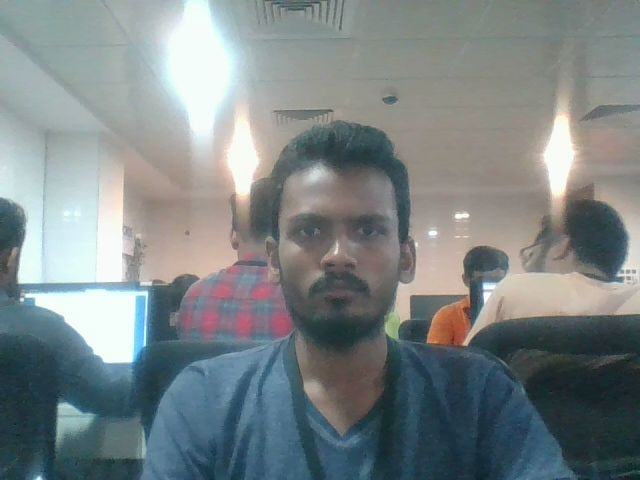

In [20]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
file = zipfile.ZipFile("./LISA_HG_Data.zip")

In [0]:
file.extractall()

In [0]:
import matplotlib.pyplot as plt
import cv2
im = cv2.imread("./art.jpg")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=im/255.0

In [0]:
plt.imshow(im)

In [0]:
tf.__version__

'1.14.0'

In [0]:
keras.__version__

'2.2.4-tf'

In [0]:
mod = keras.models.load_model('./signs.h5')

W0712 09:39:26.947967 139852993255296 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0712 09:39:26.953410 139852993255296 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0712 09:39:26.960598 139852993255296 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecat

In [0]:
# test the model

In [0]:
!wget "http://www.ee.oulu.fi/research/imag/Ouhands/OUHANDS_test.tar.gz"

--2019-07-12 11:58:24--  http://www.ee.oulu.fi/research/imag/Ouhands/OUHANDS_test.tar.gz
Resolving www.ee.oulu.fi (www.ee.oulu.fi)... 130.231.61.28, 2001:708:520:80::28
Connecting to www.ee.oulu.fi (www.ee.oulu.fi)|130.231.61.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1306996260 (1.2G) [application/x-gzip]
Saving to: ‘OUHANDS_test.tar.gz’

OUHANDS_test.tar.gz 100%[===================>]   1.22G  19.7MB/s    in 64s     

2019-07-12 11:59:29 (19.5 MB/s) - ‘OUHANDS_test.tar.gz’ saved [1306996260/1306996260]



In [0]:
!tar xvf "OUHANDS_test.tar.gz"

In [0]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
from sklearn.utils import shuffle

In [0]:
model = keras.models.load_model('sign93.h5')

In [0]:
def loadtest():
  trainlst = os.listdir('./test/hand_data/colour')
  img_dir = './test/hand_data/colour'
  trainimages = []
  labels = []
  for imagename in trainlst:
    if(len(imagename)>4):
      im = image.load_img(os.path.join(img_dir,imagename))
      im = image.img_to_array(im)
      im = cv2.resize(im,(299,299))
      im = im/255.0
      trainimages.append(im)
      if(imagename.startswith('A')):
        labels.append(0)
      elif(imagename.startswith('B')):
        labels.append(1)
      elif(imagename.startswith('C')):
        labels.append(2)
      elif(imagename.startswith('D')):
        labels.append(3)
      elif(imagename.startswith('E')):
        labels.append(4)
      elif(imagename.startswith('F')):
        labels.append(5)
      elif(imagename.startswith('H')):
        labels.append(6)
      elif(imagename.startswith('I')):
        labels.append(7)
      elif(imagename.startswith('J')):
        labels.append(8)
      elif(imagename.startswith('K')):
        labels.append(9)
      
  return np.array(trainimages),np.array(labels)

In [0]:
X,y = loadtest()

In [0]:
X_eval,y_eval = shuffle(X,y)
X=[]
y=[]

In [0]:
model.evaluate(X_eval,y_eval,64)

1000/1000 [==============================] - 9s 9ms/sample - loss: 0.3904 - acc: 0.8740


[0.390426721572876, 0.874]